# **Federated Learning with Differential Privacy**

### **Case Study:**

#### **1. Introduction to Federated Learning (FL)**

Federated Learning (FL) is a machine learning technique that allows multiple decentralized devices (or clients) to collaboratively train a model without sharing raw data with each other or a central server. Instead of collecting all the data in a single place, the model is trained locally on each client, and only model updates (such as gradients) are shared with a central server. This decentralized learning process maintains data privacy, as no personal data is ever shared across devices.

* **Client Model**: Each client, such as a mobile phone or IoT device, trains a local copy of the model using its private data. This local training process ensures the data remains on the client device.

* **Server Model**: The central server aggregates the updates received from the clients to improve the global model. The server doesn't have access to the raw data, only the model updates.

<div style="text-align: center;">
    <img src="https://www.dailydoseofds.com/content/images/2023/11/federated-gif.gif" alt="Epsilon Impact" width="700">
</div>

#### **2. The Need for Privacy in Federated Learning**

While federated learning provides a strong foundation for data privacy by not transmitting raw data, the model updates (gradients) exchanged between clients and the server can still reveal sensitive information. To mitigate this risk, Differential Privacy (DP) is applied to the model updates to ensure that individual data points cannot be identified or reconstructed from these updates.

#### **3. Differential Privacy in Federated Learning**

Differential Privacy (DP) is a privacy-enhancing technique designed to provide mathematical guarantees about the privacy of individual data points, even in the presence of aggregate data. DP introduces noise to the data or model updates in a way that ensures no individual’s data can be singled out, while still allowing the model to learn useful patterns.

In the context of federated learning, differential privacy can be applied to:

* **Local Updates**: Adding noise to the model updates before they are sent to the server.
* **Global Aggregation**: Adding noise to the aggregated updates on the server before they are used to update the global model.

By introducing this noise, differential privacy helps ensure that the model updates do not reveal information about any individual client’s data.

#### **4. Centralized Differential Privacy (CDP) vs. Local Differential Privacy (LDP)**

There are two primary types of differential privacy that can be used in federated learning: Centralized Differential Privacy (CDP) and Local Differential Privacy (LDP).

* **Centralized Differential Privacy (CDP)**: In this approach, noise is added to the model updates at the server level, after the clients have already sent their updates. CDP provides privacy guarantees for the aggregated data received from the clients. It is typically easier to implement since the server controls the noise addition process, but it does rely on the trustworthiness of the server.

* **Local Differential Privacy (LDP)**: In contrast, LDP adds noise at the client level before the updates are sent to the server. This approach ensures that even the server cannot deduce any individual information from the updates. LDP provides stronger privacy guarantees, as the clients are directly responsible for their privacy, but it can introduce more noise, reducing the quality of the model updates.

Both CDP and LDP are designed to provide robust privacy guarantees, but the choice between them depends on the desired balance between privacy and model accuracy.

#### **5. Global Aggregation Methods in Federated Learning**

Once the clients have trained their local models and potentially applied differential privacy, the server must aggregate these local updates into a global model. Several methods are used for global aggregation:

* **Federated Averaging (FedAvg)**: This is the most common aggregation method in federated learning. It computes the weighted average of the model updates from all clients. The weight for each update is typically based on the amount of data on the client, ensuring that clients with more data contribute more to the global model.

**Mathematical Concept:**

Let’s assume there are $K$ clients. Each client $k$ trains a model locally using its own data and computes a model update $w_{k}$​ (which can represent the model parameters or the gradient updates) after local training. The server aggregates these local updates to form the global model wglobalwglobal​.

Let:

* $n_{k}​$: The number of data points on client $k$.
* $N$: The total number of data points across all clients (i.e., $N= \sum_{k=1}^{K}n_{k}$​).
* $w_{k}$​: The model parameters after training on client k.
* $w_{global}$​: The global model parameters that the server computes after aggregation.

The aggregation step in FedAvg is given by the weighted average:
$$w_{global}=\frac{1}{N} \sum_{k=1}^Kn_kw_k$$

This ensures that clients with more data $(n_k)$ contribute more to the global model wglobalwglobal​. It reflects a natural weighting of the client models by the size of their respective datasets.

* **Federated Stochastic Gradient Descent (FedSGD)**: In this method, the server aggregates the gradients directly instead of averaging the models. The gradients are sent by clients after they perform a local update, and the server uses these gradients to perform the global update.

**Mathematical Concept:**

Let:

* $g_k$​ be the gradient of the loss function computed by client kk.
* $g_{global}$​ be the aggregated gradient.
* $η$ be the learning rate.
* $w_{global}$​ be the global model parameters.

Each client kk computes a gradient $g_k=∇f_k(w)$ based on its local loss function $f_k$​, where ww are the model parameters.

At the server, the gradients from each client are aggregated by computing their average (or weighted average in some cases):
$$g_{global}=\frac{1}{N} \sum_{k=1}^Kn_kg_k$$

where:

* $n_k$​: The number of data points on client $k$.
* $N$: The total number of data points.

The server then performs an update on the global model:
$$w_{global}^{t+1}=w_{global}^t−ηg_{global}$$


This update step allows the server to improve the global model based on the averaged gradients computed by the clients. Unlike FedAvg, which averages the model parameters, FedSGD directly updates the model using the gradient information.

* **Secure Aggregation**: To enhance privacy, secure aggregation protocols can be used. This ensures that the server only sees the aggregated result, without being able to observe individual updates from clients, protecting the privacy of the model updates.

**Mathematical Concept:**

To achieve secure aggregation, the clients first apply encryption (such as additive homomorphic encryption) to their model updates before sending them to the server. The server can then aggregate the encrypted model updates without seeing the individual updates.

Let's assume each client kk sends an encrypted update $\hat{w}_{k}​$, where:
$$\hat{w}_k=w_k+e_k$$

Here, ekek​ is the encryption (noise) that hides the true model update $w_k$ from the server, and $\hat{w}_k$​ is the noisy (encrypted) update that is sent to the server.

The server only sees the sum of the encrypted updates:
$$\hat{w}_{global}=\sum_{k=1}^K\hat{w}_k$$

The key property of additive homomorphic encryption is that the server can compute the sum of the encrypted values:
$$\hat{w}_{global}=\sum_{k=1}^K(w_k+e_k)=\sum_{k=1}^Kw_k+\sum_{k=1}^Ke_k$$

The server cannot see the individual updates wkwk​, but it can still aggregate them to compute the global model update.

To remove the noise, clients use a decryption key to decrypt their updates before sending them. This process ensures that only the sum of the updates is visible to the server, preserving client privacy.

_____

Federated Learning combined with Differential Privacy provides a powerful framework for privacy-preserving machine learning. By allowing clients to train models on their own data without sharing it and applying noise to the updates, federated learning ensures privacy while still enabling the creation of accurate global models. The choice between Centralized and Local Differential Privacy and the selection of global aggregation methods depend on the specific privacy and accuracy requirements of the application.

In your case study, the implementation of FL with DP (either CDP or LDP) can serve as a foundation for understanding how privacy-preserving machine learning systems can be built, particularly in industries like healthcare, finance, or IoT, where data privacy is of utmost importance.


In [ ]:
!pip install torchmetrics
!pip install opacus

In [36]:
import random
import copy
from datetime import date
import time
import os
import matplotlib.pyplot as plt
from collections import OrderedDict

import numpy as np
import torch
import torchmetrics
from torch import nn, tanh
from torch.nn.functional import relu, softmax, max_pool2d

import torchvision.transforms as transforms
from torchvision.datasets import MNIST, FashionMNIST

from collections import defaultdict

import opacus
from opacus.validators import ModuleValidator
from opacus.utils.batch_memory_manager import BatchMemoryManager

### Loading MNIST10 Dataset

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

DATA_NAME = 'mnist'
root = '~/torch_data'
NUM_CLIENTS = 50
BATCH_SIZE = 64
NUM_CLASSES = 10
NUM_CLASES_PER_CLIENT = 10
sample_rate = 1

LEARNING_RATE_DIS = 2e-1
EPOCHS = 1
ROUNDS = 100
MODE = "LDP"
target_epsilon = 8
mp_bs = 64
target_delta = 1e-3

user_param = {'disc_lr': LEARNING_RATE_DIS, 'epochs': EPOCHS}
user_param['rounds'] = ROUNDS
user_param['target_epsilon'] = target_epsilon
user_param['target_delta'] = target_delta
user_param['sr'] = sample_rate
user_param['mp_bs'] = mp_bs

server_param = {}

In [38]:
def get_datasets(data_name, dataroot, preprocess = None):
    if data_name == 'mnist':
        normalization = transforms.Normalize((0.5,), (0.5,))
        transform = transforms.Compose([transforms.ToTensor(), normalization])
        data_obj = MNIST
    elif data_name == 'fashionmnist':
        normalization = transforms.Normalize((0.5,), (0.5,))
        transform = transforms.Compose([transforms.ToTensor(),  normalization])
        data_obj = FashionMNIST
    else:
        raise ValueError("choose data_name from ['mnist', 'fashionmnist']")


    train_set = data_obj(dataroot, train=True, transform=transform, download=True)
    test_set = data_obj(dataroot, train=False, transform=transform)
    return train_set, test_set

In [39]:
def get_num_classes_samples(dataset):
    """
    extracts info about certain dataset
    :param dataset: pytorch dataset object
    :return: dataset info number of classes, number of samples, list of labels
    """
    # ---------------#
    # Extract labels #
    # ---------------#
    if isinstance(dataset, torch.utils.data.Subset):
        if isinstance(dataset.dataset.targets, list):
            data_labels_list = np.array(dataset.dataset.targets)[dataset.indices]
        else:
            data_labels_list = dataset.dataset.targets[dataset.indices]
    else:
        if isinstance(dataset.targets, list):
            data_labels_list = np.array(dataset.targets)
        else:
            data_labels_list = dataset.targets
    classes, num_samples = np.unique(data_labels_list, return_counts=True)
    num_classes = len(classes)
    return num_classes, num_samples, data_labels_list

In [40]:
def gen_classes_per_node(dataset, num_users, classes_per_user=2, high_prob=0.6, low_prob=0.4):
    """
    creates the data distribution of each client
    :param dataset: pytorch dataset object
    :param num_users: number of clients
    :param classes_per_user: number of classes assigned to each client
    :param high_prob: highest prob sampled
    :param low_prob: lowest prob sampled
    :return: dictionary mapping between classes and proportions, each entry refers to other client
    """
    num_classes, num_samples, _ = get_num_classes_samples(dataset)

    # -------------------------------------------#
    # Divide classes + num samples for each user #
    # -------------------------------------------#
    # print(num_classes)
    assert (classes_per_user * num_users) % num_classes == 0, "equal classes appearance is needed"
    count_per_class = (classes_per_user * num_users) // num_classes
    class_dict = {}
    for i in range(num_classes):
        probs=np.array([1]*count_per_class)
        probs_norm = (probs / probs.sum()).tolist()
        class_dict[i] = {'count': count_per_class, 'prob': probs_norm}
    # -------------------------------------#
    # Assign each client with data indexes #
    # -------------------------------------#
    class_partitions = defaultdict(list)
    for i in range(num_users):
        c = []
        for _ in range(classes_per_user):
            class_counts = [class_dict[i]['count'] for i in range(num_classes)]
            max_class_counts = np.where(np.array(class_counts) == max(class_counts))[0]
            max_class_counts = np.setdiff1d(max_class_counts, np.array(c))
            c.append(np.random.choice(max_class_counts))
            class_dict[c[-1]]['count'] -= 1
        class_partitions['class'].append(c)
        class_partitions['prob'].append([class_dict[i]['prob'].pop() for i in c])
    return class_partitions

In [41]:
def gen_classes_per_node(dataset, num_users, classes_per_user=2, high_prob=0.6, low_prob=0.4):
    """
    creates the data distribution of each client
    :param dataset: pytorch dataset object
    :param num_users: number of clients
    :param classes_per_user: number of classes assigned to each client
    :param high_prob: highest prob sampled
    :param low_prob: lowest prob sampled
    :return: dictionary mapping between classes and proportions, each entry refers to other client
    """
    num_classes, num_samples, _ = get_num_classes_samples(dataset)

    # -------------------------------------------#
    # Divide classes + num samples for each user #
    # -------------------------------------------#
    # print(num_classes)
    assert (classes_per_user * num_users) % num_classes == 0, "equal classes appearance is needed"
    count_per_class = (classes_per_user * num_users) // num_classes
    class_dict = {}
    for i in range(num_classes):
        probs=np.array([1]*count_per_class)
        probs_norm = (probs / probs.sum()).tolist()
        class_dict[i] = {'count': count_per_class, 'prob': probs_norm}
    # -------------------------------------#
    # Assign each client with data indexes #
    # -------------------------------------#
    class_partitions = defaultdict(list)
    for i in range(num_users):
        c = []
        for _ in range(classes_per_user):
            class_counts = [class_dict[i]['count'] for i in range(num_classes)]
            max_class_counts = np.where(np.array(class_counts) == max(class_counts))[0]
            max_class_counts = np.setdiff1d(max_class_counts, np.array(c))
            c.append(np.random.choice(max_class_counts))
            class_dict[c[-1]]['count'] -= 1
        class_partitions['class'].append(c)
        class_partitions['prob'].append([class_dict[i]['prob'].pop() for i in c])
    return class_partitions

In [42]:
def gen_data_split(dataset, num_users, class_partitions):
    """
    divide data indexes for each client based on class_partition
    :param dataset: pytorch dataset object (train/val/test)
    :param num_users: number of clients
    :param class_partitions: proportion of classes per client
    :return: dictionary mapping client to its indexes
    """
    num_classes, num_samples, data_labels_list = get_num_classes_samples(dataset)

    # -------------------------- #
    # Create class index mapping #
    # -------------------------- #
    data_class_idx = {i: np.where(data_labels_list == i)[0] for i in range(num_classes)}

    # --------- #
    # Shuffling #
    # --------- #
    for data_idx in data_class_idx.values():
        random.shuffle(data_idx)

    # ------------------------------ #
    # Assigning samples to each user #
    # ------------------------------ #
    user_data_idx = [[] for i in range(num_users)]
    for usr_i in range(num_users):
        for c, p in zip(class_partitions['class'][usr_i], class_partitions['prob'][usr_i]):
            end_idx = int(num_samples[c] * p)
            user_data_idx[usr_i].extend(data_class_idx[c][:end_idx])
            data_class_idx[c] = data_class_idx[c][end_idx:]
        if len(user_data_idx[usr_i])%2 == 1: user_data_idx[usr_i] = user_data_idx[usr_i][:-1]

    return user_data_idx

In [43]:
def gen_random_loaders(data_name, data_path, num_users, bz, num_classes_per_user, num_classes, preprocess=None):
    """
    generates train/val/test loaders of each client
    :param data_name: name of dataset, choose from [mnist10, fashionmnist, chmnist]
    :param data_path: root path for data dir
    :param num_users: number of clients
    :param bz: batch size
    :param classes_per_user: number of classes assigned to each client
    :return: train/val/test loaders of each client, list of pytorch dataloaders
    """
    loader_params = {"batch_size": bz, "shuffle": False, "pin_memory": True, "num_workers": 0}
    dataloaders = []
    datasets = get_datasets(data_name, data_path, preprocess=preprocess)
    # print(datasets)
    cls_partitions = None
    distribution = np.zeros((num_users, num_classes))
    for i, d in enumerate(datasets):
        if i == 0:
            cls_partitions = gen_classes_per_node(d, num_users, num_classes_per_user)
            # print(cls_partitions)
            for index in range(num_users):
                distribution[index][cls_partitions['class'][index]] = cls_partitions['prob'][index]

            loader_params['shuffle'] = True
        usr_subset_idx = gen_data_split(d, num_users, cls_partitions)

        subsets = list(map(lambda x: torch.utils.data.Subset(d, x), usr_subset_idx))
        dataloaders.append(list(map(lambda x: torch.utils.data.DataLoader(x, **loader_params), subsets)))

    return dataloaders

In [44]:
# we get the training data and test data for each user right now.
train_dataloaders, test_dataloaders  = gen_random_loaders(DATA_NAME, root, NUM_CLIENTS, BATCH_SIZE, NUM_CLASES_PER_CLIENT, NUM_CLASSES)

In [45]:
len(train_dataloaders), len(test_dataloaders)

(50, 50)

### Save the training dataset and test dataset

In [46]:
def saveClientData(NUM_CLIENTS, dataset, folder_name, train = True):

    if train:
        train = 'train'
    else:
        train = 'test'

    for i in range(NUM_CLIENTS):
        data_directory = f'./{folder_name}/client_{train}_data'
        os.makedirs(data_directory, exist_ok = True)

        user_batch_data = []
        user_batch_labels = []
        for img, lab in dataset[i]:
            user_batch_data.append(img)
            user_batch_labels.append(lab)

        user_data_tensor = torch.cat(user_batch_data, dim=0)
        user_labels_tensor = torch.cat(user_batch_labels, dim=0)

        # Save the concatenated data and labels to a single file
        torch.save({'images': user_data_tensor, 'labels': user_labels_tensor}, f'{data_directory}/client_{train}_{i:02}.pt')


def saveWeights(users, folder_name):
    weight_directory = f'./{folder_name}/client_model_weights'
    os.makedirs(weight_directory, exist_ok=True)
    for i in range(len(users)):
        # print('saving the weights of users:')
        torch.save(users[i].get_model_state_dict(), f"{weight_directory}/weight_user{i:02}.pth")

def saveServerWeights(server, folder_name):
    model_directory = f'./{folder_name}/server_model_weights'
    os.makedirs(model_directory, exist_ok = True)
    torch.save(server.model.state_dict(), f"{model_directory}/sever_model.pth")


folder_name = 'FL_LDP_data'
saveClientData(NUM_CLIENTS, train_dataloaders, folder_name, train = True)
saveClientData(NUM_CLIENTS, test_dataloaders, folder_name, train = False)

## Building LDP User model

In [47]:
(28, 28)

(28, 28)

In [48]:
# MODELS
class mnist_fully_connected(nn.Module):
    def __init__(self,num_classes):
        super(mnist_fully_connected, self).__init__()
        self.hidden1 = 600
        self.hidden2 = 100
        self.fc1 = nn.Linear(28 * 28, self.hidden1, bias=False)
        self.relu_ = nn.ReLU(inplace=False)
        self.fc2 = nn.Linear(self.hidden1, self.hidden2, bias=False)
        self.relu = nn.ReLU(inplace=True)
        self.fc3 = nn.Linear(self.hidden2, num_classes, bias=False)

    def forward(self,x, return_probs=True):
        x = x.view(-1, 28 * 28)
        x = self.relu_(self.fc1(x))
        x = relu(self.fc2(x))
        logits = self.fc3(x)
        if return_probs:
            return logits, softmax(logits, dim = 1)
        else:
            return logits


## LDP CLIENT MODELS SETTINGS

In [49]:
class LDPUser:
    def __init__(self, index, device, model, n_classes, input_shape, train_dataloader, epochs, rounds,
                 target_epsilon, target_delta, sr, max_norm=2.0, disc_lr=5e-1, mp_bs = 3):
        self.index = index
        self.rounds = rounds
        self.target_epsilon = target_epsilon
        self.epsilon = 0
        self.delta = target_delta
        self.model = model(num_classes=n_classes)
        self.model = ModuleValidator.fix(self.model)
        self.train_dataloader = train_dataloader
        self.sr = sr
        self.mp_bs = mp_bs
        self.loss_fn = torch.nn.CrossEntropyLoss()
        self.disc_lr = disc_lr
        self.acc_metric = torchmetrics.Accuracy(task = 'multiclass', num_classes=10).to(device)
        self.device = device
        self.max_norm= max_norm
        self.epochs = epochs
        self.optim = torch.optim.SGD(self.model.parameters(), self.disc_lr)
        self.make_local_private()



    def make_local_private(self):
        self.privacy_engine = opacus.PrivacyEngine()
        self.model, self.optim, self.train_dataloader = self.privacy_engine.make_private_with_epsilon(module=self.model, optimizer=self.optim,
                                                                                                      data_loader=self.train_dataloader, epochs=self.epochs*self.rounds*self.sr,
                                                                                                      target_epsilon=self.target_epsilon, target_delta=self.delta,
                                                                                                      max_grad_norm=self.max_norm)

    def train(self):
        self.model = self.model.to(self.device)
        self.model.train()
        for epoch in range(self.epochs):
            with BatchMemoryManager(data_loader=self.train_dataloader, max_physical_batch_size=self.mp_bs, optimizer=self.optim) as batch_loader:
                for images, labels in batch_loader:
                    images, labels = images.to(self.device), labels.to(self.device)
                    self.optim.zero_grad()
                    logits, preds = self.model(images, return_probs=True)
                    loss = self.loss_fn(logits, labels)
                    loss.backward()
                    self.optim.step()
                    self.acc_metric(preds, labels)
        self.epsilon = self.privacy_engine.get_epsilon(self.delta)
        print(f"Client: {self.index} ACC: , episilon: {self.epsilon}")
        self.acc_metric.reset()
        self.model.to('cpu')

    def evaluate(self, dataloader):
        self.model.to(self.device)
        self.model.eval()
        testing_corrects = 0
        testing_sum = 0
        with torch.no_grad():
            for images, labels in dataloader:
                images, labels = images.to(self.device), labels.to(self.device)
                _, preds = self.model(images, return_probs=True)
                testing_corrects += torch.sum(torch.argmax(preds, dim=1) == labels)
                testing_sum += len(labels)
        self.model.to('cpu')
        return testing_corrects.cpu().detach().numpy(), testing_sum

    def get_model_state_dict(self):
        return self.model.state_dict()

    def set_model_state_dict(self, weights):
        for key, value in self.model.state_dict().items():
            if 'bn' not in key:
                self.model.state_dict()[key].data.copy_(weights[key])

## LDP SERVER MODEL SETTINGS

In [50]:
class LDPServer:
    def __init__(self, device, model, n_classes, input_shape, noise_multiplier=1, sample_clients=10, disc_lr=1):
        self.model = model(num_classes=n_classes)
        self.model = ModuleValidator.fix(self.model)
        self.privacy_engine = opacus.PrivacyEngine()
        self.model = self.privacy_engine._prepare_model(self.model)
        self.device = device
        self.noise_multiplier = noise_multiplier
        self.sample_clients = sample_clients
        self.disc_lr = disc_lr

    def get_model_state_dict(self):
        return self.model.state_dict()

# Get the average weight of the client models.
def agg_weights(weights):
    with torch.no_grad():
        weights_avg = copy.deepcopy(weights[0])
        for k in weights_avg.keys():
            for i in range(1, len(weights)):
                weights_avg[k] += weights[i][k]
            weights_avg[k] = torch.div(weights_avg[k], len(weights))
    return weights_avg

def evaluate_global(users, test_dataloders, users_index):
    testing_corrects = 0
    testing_sum = 0
    for index in users_index:
        corrects, num = users[index].evaluate(test_dataloders[index])
        testing_corrects += corrects
        testing_sum += num
    print(f"Acc: {testing_corrects / testing_sum}")
    return (testing_corrects / testing_sum)

In [51]:
user_obj = LDPUser
server_obj = LDPServer
MODEL = mnist_fully_connected
server_obj = LDPServer
server = server_obj(device, MODEL, NUM_CLASSES, None, **server_param)
users = [user_obj(i, device, MODEL, NUM_CLASSES, None, train_dataloaders[i], **user_param) for i in range(NUM_CLIENTS)]

for i in range(NUM_CLIENTS):
    users[i].set_model_state_dict(server.get_model_state_dict())

In [52]:
best_acc = 0
for round in range(ROUNDS): # Changed to one for practice. ROUND

    random_index = np.random.choice(NUM_CLIENTS, int(sample_rate*NUM_CLIENTS), replace=False)
    for index in random_index:
        users[index].train() # training the user for each round.
    # for index in random_index:users[index].set_model_state_dict2(torch.load(client_weights[index]))

    # Saving the models and the weight in the last round
    if round == ROUNDS - 1:
        saveWeights(users, folder_name)

    if round == ROUNDS - 2:
        saveServerWeights(server, folder_name)

    if MODE == "LDP":
        weights_agg = agg_weights([users[index].get_model_state_dict() for index in random_index])
        for i in range(NUM_CLIENTS):
            users[i].set_model_state_dict(weights_agg)
    else:
        server.agg_updates([users[index].get_model_state_dict() for index in random_index])
        for i in range(NUM_CLIENTS):
            users[i].set_model_state_dict(server.get_model_state_dict())

    print(f"Round: {round+1}")
    acc = evaluate_global(users, test_dataloaders, range(NUM_CLIENTS))
    if acc > best_acc:
        best_acc = acc
    if MODE == "LDP":
        eps = max([user.epsilon for user in users])
        print(f"Epsilon: {eps}")
        if eps > target_epsilon:
            break

print('Federated Learning Client Training Finished')

/home/mujtaba/miniconda3/envs/privatefl/lib/python3.8/site-packages/torch/nn/modules/module.py:1640: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


Client: 9 ACC: , episilon: 0.6176692042445545
Client: 40 ACC: , episilon: 0.6176692042445545
Client: 13 ACC: , episilon: 0.6176692042445545
Client: 14 ACC: , episilon: 0.6176692042445545
Client: 17 ACC: , episilon: 0.6176692042445545
Client: 47 ACC: , episilon: 0.6176692042445545
Client: 26 ACC: , episilon: 0.6176692042445545
Client: 30 ACC: , episilon: 0.6176692042445545
Client: 0 ACC: , episilon: 0.6176692042445545
Client: 46 ACC: , episilon: 0.6176692042445545
Client: 6 ACC: , episilon: 0.6176692042445545
Client: 37 ACC: , episilon: 0.6176692042445545
Client: 23 ACC: , episilon: 0.6176692042445545
Client: 24 ACC: , episilon: 0.6176692042445545
Client: 21 ACC: , episilon: 0.6176692042445545
Client: 2 ACC: , episilon: 0.6176692042445545
Client: 19 ACC: , episilon: 0.6176692042445545
Client: 32 ACC: , episilon: 0.6176692042445545
Client: 15 ACC: , episilon: 0.6176692042445545
Client: 11 ACC: , episilon: 0.6176692042445545
Client: 36 ACC: , episilon: 0.6176692042445545
Client: 44 ACC: ,

In [53]:
training_data = torch.load('./FL_LDP_data/client_train_data/client_train_00.pt')
testing_data = torch.load('./FL_LDP_data/client_test_data/client_test_00.pt')

x_train = training_data['images']
y_train = training_data['labels']
x_test = testing_data['images']
y_test = testing_data['labels']
# convert the labels to one_hot_encoding
num_classes = len(torch.unique(y_train))

print(f"Train data shape: {x_train.shape}, training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, test labels shape: {y_test.shape}")

Train data shape: torch.Size([1194, 1, 28, 28]), training labels shape: torch.Size([1194])
Test data shape: torch.Size([194, 1, 28, 28]), test labels shape: torch.Size([194])


/tmp/ipykernel_1410059/302793314.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_data = torch.load('./FL_LDP_data/client_train_data/client_train_00.pt')
/tmp/ip

In [54]:
def strip_prefix(state_dict, prefix="_module."):
    """
    Strip a prefix from the state_dict keys.
    Args:
        state_dict (dict): The state_dict with the potentially prefixed keys.
        prefix (str): The prefix to remove.
    Returns:
        dict: The state_dict with the prefix removed from the keys.
    """
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        if k.startswith(prefix):
            new_state_dict[k[len(prefix):]] = v
        else:
            new_state_dict[k] = v
    return new_state_dict

In [55]:
model_path = './FL_LDP_data/client_model_weights/weight_user00.pth'  # Path to your saved model weights
model = mnist_fully_connected(num_classes)

# Load the state_dict
state_dict = torch.load(model_path)
# Strip the "_module." prefix if it exists
state_dict = strip_prefix(state_dict, prefix="_module.")
# Load the modified state_dict into the model
model.load_state_dict(state_dict)
# Set the model to evaluation mode

# Check the models accuracy on the test data
with torch.no_grad():
    test_logits, _ = model(x_test)

prediction = torch.sum(torch.argmax(test_logits, axis = 1) == y_test) / len(y_test)
print('The accuray on the test data is : ', prediction.numpy() * 100)

The accuray on the test data is :  88.65979313850403


/tmp/ipykernel_1410059/1808637162.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


#### Visualize the train data and labels

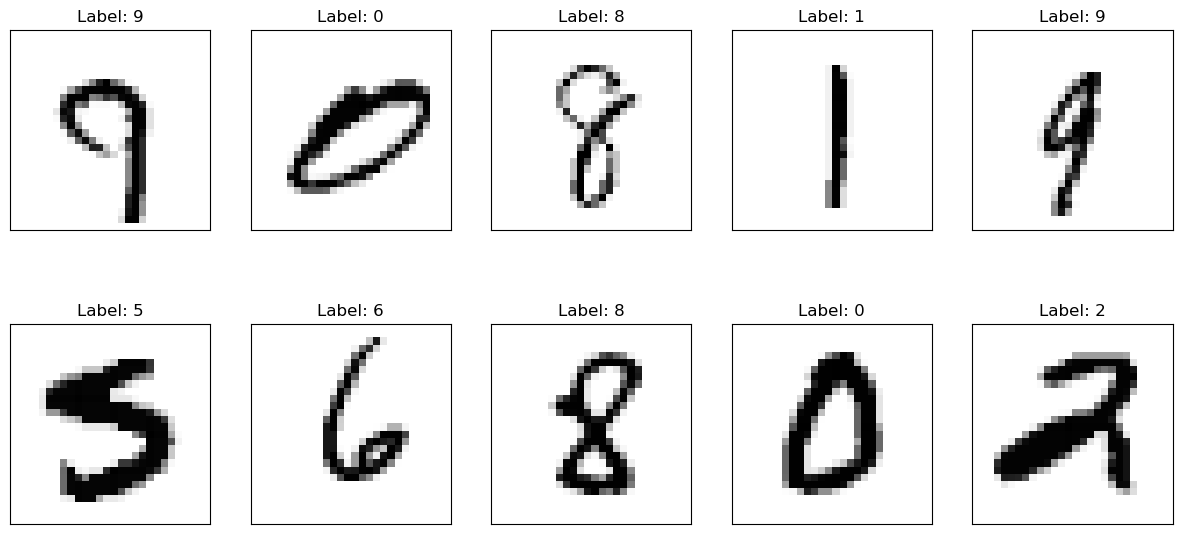

In [56]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
  img = image.permute(1, 2, 0)
  ax[i].imshow(img, cmap = "Greys")
  ax[i].set_title(f"Label: {label}",  fontsize=12)
  ax[i].set_xticks([])
  ax[i].set_yticks([])

#### Visualize the test data and labels

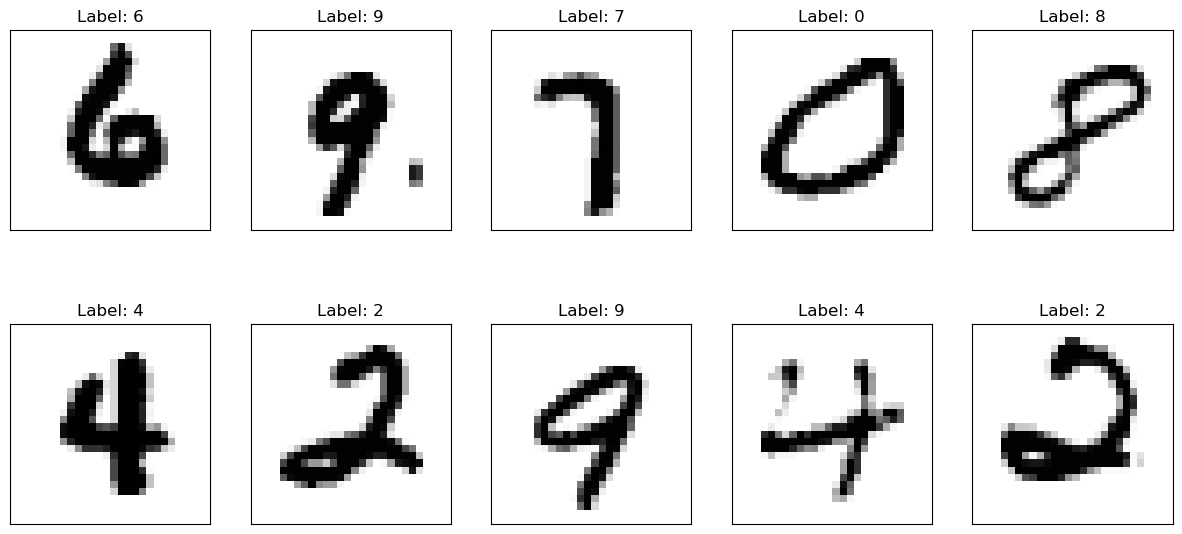

In [57]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test[:10], y_test[:10])):
  img = image.permute(1, 2, 0)
  ax[i].imshow(img, cmap = "Greys")
  ax[i].set_title(f"Label: {label}",  fontsize=12)
  ax[i].set_xticks([])
  ax[i].set_yticks([])